In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

## 0. Basics
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

- Loading image
    - Images can be loaded using load_img() function
    - Images can be converted to numpy array using img_to_array() function

In [17]:
img1 = image.load_img('dog.jpg', target_size = (100,100)) # 이거 변경해서 그냥 이미지 크기 바꿀수있네요

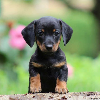

In [18]:
img1

In [19]:
img1 = image.img_to_array(img)

In [20]:
img1

array([[[151., 187., 143.],
        [179., 194., 155.],
        [195., 203., 164.],
        ...,
        [ 44.,  46.,  33.],
        [ 36.,  37.,  29.],
        [ 34.,  35.,  29.]],

       [[154., 188., 153.],
        [182., 196., 161.],
        [200., 208., 169.],
        ...,
        [ 45.,  47.,  34.],
        [ 35.,  36.,  28.],
        [ 31.,  32.,  26.]],

       [[150., 185., 153.],
        [179., 193., 160.],
        [201., 207., 169.],
        ...,
        [ 45.,  47.,  34.],
        [ 35.,  36.,  28.],
        [ 31.,  32.,  24.]],

       ...,

       [[223., 211., 199.],
        [237., 221., 198.],
        [237., 224., 208.],
        ...,
        [232., 220., 208.],
        [204., 201., 186.],
        [224., 217., 199.]],

       [[229., 224., 205.],
        [237., 223., 220.],
        [216., 201., 182.],
        ...,
        [133., 122., 116.],
        [225., 220., 216.],
        [119., 112., 106.]],

       [[220., 211., 196.],
        [230., 230., 218.],
        [219., 2

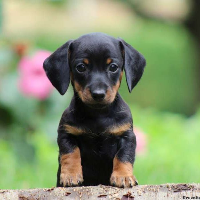

In [22]:
img2 = image.load_img('dog.jpg', target_size = (200,200)) # 이거 변경해서 그냥 이미지 크기 바꿀수있네요
img2

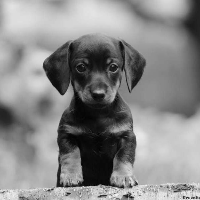

In [27]:
img3 = image.load_img('dog.jpg', target_size = (200,200),color_mode='grayscale') # 흑백도 가능합니다
img3

## 1. Padding
- Two types of padding options
    - **'valid'**: no padding (drop right-most columns & bottom-most rows)
    - **'same'**: padding size **p = [k/2]** when kernel size = **k**
- Customized paddings can be given with ZeroPadding**n**D layer

In [6]:
# when padding = 'valid'
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3),  # 이건 앞과 같음
                 filters = 10, # filters 의 갯수
                 kernel_size = (3,3), # filter 의 size 는 얼마나로? (kernel 이라고도함 )
                 strides = (1,1), # stride 는 어떻게 움직일지
                 padding = 'valid')) # valid 는 padding 잉 없는경우

In [7]:
print(model.output_shape) # dim 이 감소한 모습

(None, 8, 8, 10)


In [52]:
# when padding = 'same'
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), 
                 filters = 10, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 padding = 'same')) # same 는 zero padding 을 넣어서, dim - reduction 을 막아준다. 

In [43]:
print(model.output_shape) # 앗 dim 이 감소하지 않은 모습

(None, 10, 10, 10)


In [ ]:
# 우리가 정의하는 패딩
# (10 X 10) 크기의 데이터에 (1, 1)의 패딩을 해주었더니 사방으로 1만큼 확장되어 아래와 같이 (12 X 12)의 output shape이 출력되는 것을 볼 수 있다.

In [53]:
# user-customized padding
input_layer = Input(shape = (10, 10, 3))
padding_layer = ZeroPadding2D(padding = (1,1))(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

In [54]:
print(model.output_shape)

(None, 12, 12, 3)


## 2. FIlter/kernels
- Number of filters can be designated
- Number of filters equals to the **depth of next layer**

In [28]:
# when filter size = 10
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [29]:
# you could see that the depth of output = 10
print(model.output_shape)

(None, 10, 10, 10)


In [30]:
# when filter size = 20
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 20, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [31]:
# you could see that the depth of output = 20
print(model.output_shape)

(None, 10, 10, 20)


## 3. Pooling
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer

In [32]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [33]:
print(model.output_shape)

(None, 10, 10, 10)


In [34]:
# stride 가 지정되지 않으면, poolsize 와 같게 된다.
# when 'strides' parameter is not defined, strides are equal to 'pool_size'
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

In [35]:
print(model.output_shape)

(None, 5, 5, 10)


In [36]:
model = Sequential()
# conv2d 층은 kernel size , stride 에 대해서 하게 된다.
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid'))

In [37]:
print(model.output_shape)

(None, 9, 9, 10)


In [38]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(AveragePooling2D(pool_size = (2,2), padding = 'valid'))

In [39]:
print(model.output_shape)

(None, 5, 5, 10)


In [40]:
# globalmaxpooling performs maxpooling over whole channel with depth = 1
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(GlobalMaxPooling2D())
# global max pooling 은 아얘 체널의 depyh 를 1 로 만들어버린다.

In [41]:
# as the number of filters = 10, 10 values are returned as result of globalmaxpooling2D
print(model.output_shape)

(None, 10)


## 4. Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [42]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [43]:
print(model.output_shape)

(None, 10, 10, 10)


In [44]:
model.add(Flatten())

In [45]:
print(model.output_shape)

(None, 1000)


## 5. Fully Connected (Dense)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated

In [46]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50))

In [47]:
print(model.output_shape)

(None, 50)
